# Chapter 25 处理多个模型
* 通过实例演示如何使用多个简单模型来更好地理解复杂数据集。
* 介绍如何使用列表列在数据框中保存任意数据结构。

## 25.1 gapminder
gapminder数据研究了各国随着时间的推移预期寿命和GDP等统计数据的变化。

我们将只关注该数据其中三个变量，探究这个问题：“每个国家（country)的寿命的期望值(lifeExp)随时间(year)如何变化？”。我们用多个简单模型来识别信号，这样我们就可能可以看到微妙的信号区别。我们还将了解模型如何帮助找出异常值和不寻常的趋势。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gapminder = pd.read_csv(r'gapminder.csv')
gapminder.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
'''
by Chenxi Zhang, 20201217:
1.本章中非必要使用对象迭代将数据整理为教材中（列表列）形式，groupby基础操作已能满足数据分析需求。
2.画图使用python库plotnine，ggplot方法进行分组，分面要简洁许多。
'''
import statsmodels.formula.api as smf
from plotnine import *

处理得到列表列：GroupBy对象支持迭代操作，会产生一个由分组变量名和数据块组成的二元元组

In [24]:
# gapminder_data = pd.DataFrame(columns = ['continent', 'country', 'data'])
# for (k1,k2), group in gapminder.groupby(['continent', 'country']):
#     gapminder_data = gapminder_data.append({'continent':k1,'country':k2,'data':group.reset_index().iloc[:,3:]}, ignore_index=True)

In [23]:
# gapminder_data

In [22]:
# gapminder_data['data'][0]

In [21]:
# gapminder_g = gapminder.pivot_table(index=['continent','country'],columns='year',values='lifeExp')
# gapminder_g

“每个国家（country)的寿命的期望值(lifeExp)随时间(year)如何变化？”

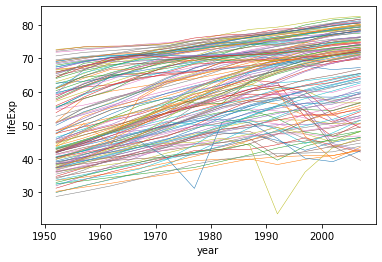

In [20]:
# gapminder_g.apply(lambda x: plt.plot(x, lw=0.5), axis = 1)
# plt.xlabel('year')
# plt.ylabel('lifeExp')
# plt.show()

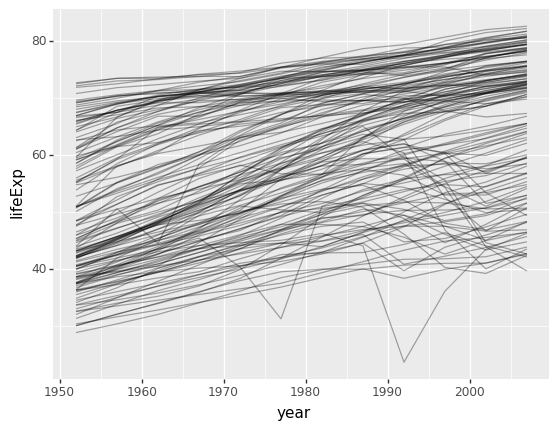

<ggplot: (-9223371920604005141)>

In [13]:
'''
by Chenxi Zhang, 20201217:
1.ggplot绘图
'''
ggplot(gapminder,aes('year','lifeExp',group = 'country')) + geom_line(alpha=1/3)

总的来说，寿命的期望值似乎在稳步提高。我们将通过一个线性模型拟合这种趋势，捕捉了寿命的期望值随着时间的推移的稳定增长的部分。然而，如果仔细观察，我们可能会注意到一些国家不遵循这种模式。我们计算残差和 R 方来寻找这些微妙的信号差异。

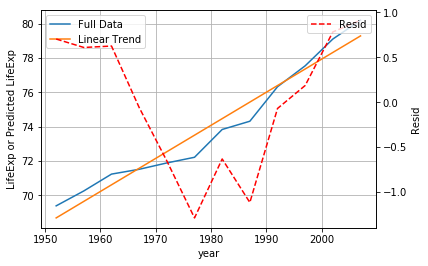

In [3]:
# def draw_figure1(gapminder_g, continent, country):
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot(gapminder_g.loc[(continent, country),:], label='Full Data')
#     poly = np.polyfit(list(gapminder_g.loc[(continent, country),:].index),list(gapminder_g.loc[(continent, country),:]), 1)
#     polyval = np.polyval(poly, list(gapminder_g.loc[(continent, country),:].index))
#     ax.plot(list(gapminder_g.loc[(continent, country),:].index), polyval, label='Linear Trend')
#     ax2 = ax.twinx()
#     ax2.plot(list(gapminder_g.loc[(continent, country),:].index), list(gapminder_g.loc[(continent, country),:])-polyval,'--r', label = 'Resid')
#     ax.legend(loc=0)
#     ax.grid()
#     ax.set_xlabel("year")
#     ax.set_ylabel("LifeExp or Predicted LifeExp")
#     ax2.set_ylabel("Resid")
#     ax2.legend(loc=1)
#     plt.show()
#     return

# draw_figure1(gapminder_g, 'Oceania', 'New Zealand')

'''
by Chenxi Zhang, 20201217:
1.该图中残差轴0值在中间，不利于理解拟合精度变化
'''

In [34]:
'''
by Chenxi Zhang, 20201217:
1.依上部分内容，对单独某一大洲某一国家的预期年龄与年份关系，建立线性模型拟合趋势。
'''
def single_mod(continent, country):
    single_data = gapminder[(gapminder['continent']==continent)&(gapminder['country']==country)]
    mod = smf.ols(formula='lifeExp~year',data=single_data).fit()
    mod_data = single_data.copy()
    mod_data['pred'] = mod.predict()
    mod_data['resid'] = mod.resid
    return mod_data
O_Z = single_mod('Oceania','New Zealand')
O_Z

,country,continent,year,lifeExp,pop,gdpPercap,pred,resid
1092,New Zealand,Oceania,1952,69.390,1994794,10556.57566,68.686923,0.703077
1093,New Zealand,Oceania,1957,70.260,2229407,12247.39532,69.651028,0.608972
1094,New Zealand,Oceania,1962,71.240,2488550,13175.67800,70.615133,0.624867
1095,New Zealand,Oceania,1967,71.520,2728150,14463.91893,71.579238,-0.059238
1096,New Zealand,Oceania,1972,71.890,2929100,16046.03728,72.543343,-0.653343
1097,New Zealand,Oceania,1977,72.220,3164900,16233.71770,73.507448,-1.287448
1098,New Zealand,Oceania,1982,73.840,3210650,17632.41040,74.471552,-0.631552
1099,New Zealand,Oceania,1987,74.320,3317166,19007.19129,75.435657,-1.115657
1100,New Zealand,Oceania,1992,76.330,3437674,18363.32494,76.399762,-0.069762
1101,New Zealand,Oceania,1997,77.550,3676187,21050.41377,77.363867,0.186133


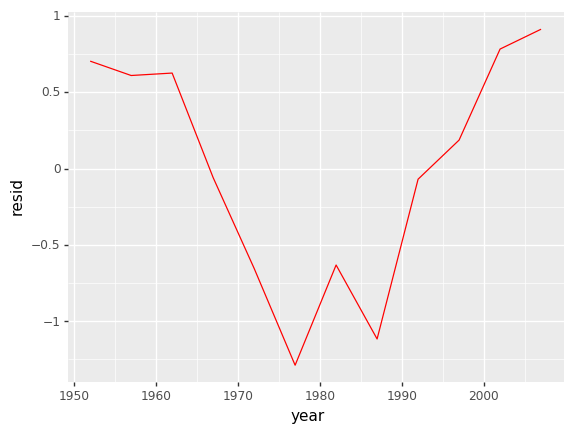

<ggplot: (116252619784)>

In [63]:
'''
by Chenxi Zhang, 20201217:
1.使用ggplot绘制单个国家线性模型，残差与真实值线图
'''
# (ggplot(O_Z) 
# + geom_line(aes('year','lifeExp'),color='blue')
# + geom_line(aes('year','pred'),color='orange'))

(ggplot(O_Z)
+ geom_line(aes('year','resid'),color='red')
)

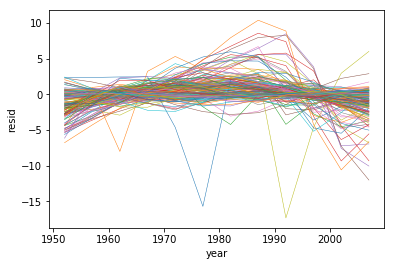

In [5]:
# def draw_figure2(gapminder_g):
#     for i in range(len(gapminder_g)):   
#         poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
#         polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
#         plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = 'Resid')
#     plt.xlabel('year')
#     plt.ylabel('resid')
#     plt.show()
#     return

# draw_figure2(gapminder_g)

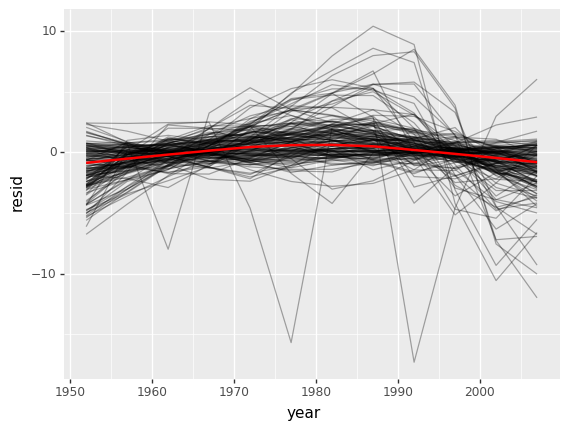

<ggplot: (-9223371920602074908)>

In [66]:
'''
by Chenxi Zhang, 20201217:
1.求并画每个国家残差
'''
#求残差
l_y_resids = gapminder.groupby(by=['country','continent']).apply(lambda x:smf.ols(formula='lifeExp~year',data=x).fit().resid)
l_y_resids = l_y_resids.reset_index().rename(columns = {0:'resid'})
resids = pd.concat([gapminder,l_y_resids['resid']],axis=1)

#画图
(ggplot(resids,aes('year', 'resid')) +
    geom_line(aes(group = 'country'), alpha = 1 / 3) + 
    geom_smooth(se = False,color='red',method = 'lowess'))

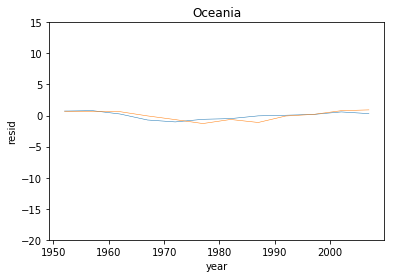

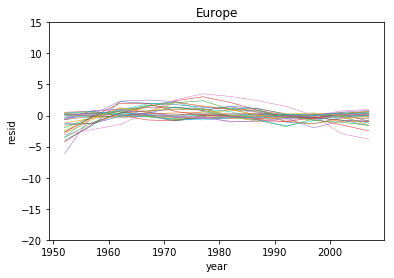

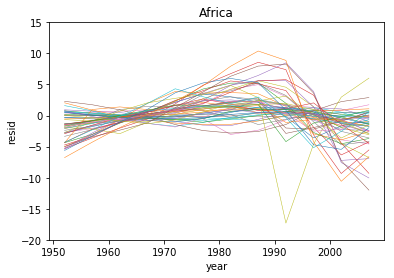

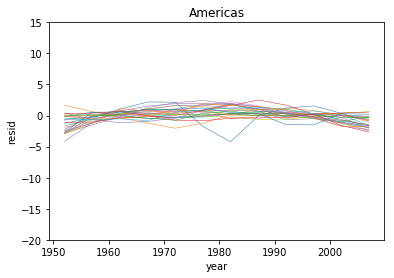

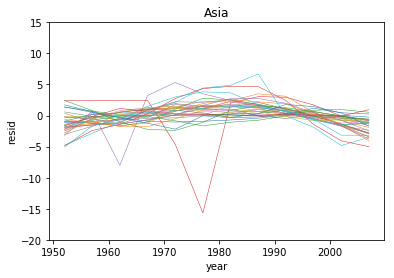

In [43]:
# def draw_figure3(gapminder_g, continent):
#     gapminder_g = gapminder_g.reset_index()
#     temp = gapminder_g[gapminder_g['continent'] == continent]
#     for i in range(len(temp)):   
#         poly = np.polyfit(list(temp.iloc[i,2:].index),list(temp.iloc[i,2:]), 1)
#         polyval = np.polyval(poly, list(temp.iloc[i,2:].index))
#         plt.plot(list(temp.iloc[i,2:].index), list(temp.iloc[i,2:])-polyval, lw = 0.5, label = 'Resid')
#     plt.xlabel('year')
#     plt.ylabel('resid')
#     plt.ylim(-20,15)
#     plt.title(continent)
#     plt.show(continent)
#     return

# draw_figure3(gapminder_g, 'Oceania')
# draw_figure3(gapminder_g, 'Europe')
# draw_figure3(gapminder_g, 'Africa')
# draw_figure3(gapminder_g, 'Americas')
# draw_figure3(gapminder_g, 'Asia')

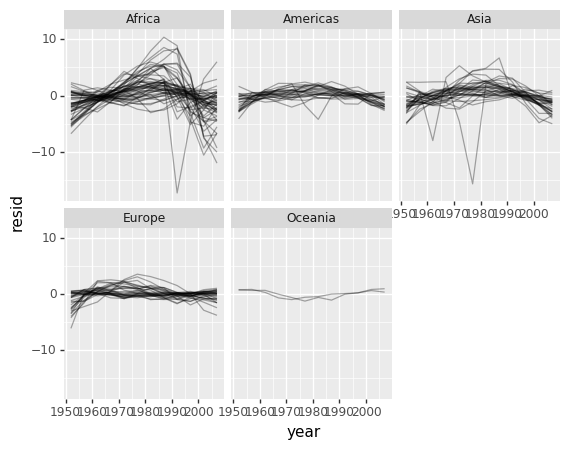

<ggplot: (116252501866)>

In [68]:
'''
by Chenxi Zhang, 20201217:
1.按各国家残差按各大洲分面绘制
'''
(ggplot(resids,aes('year', 'resid',group='country')) +
    geom_line(alpha = 1 / 3) + 
    facet_wrap('~continent'))

在非洲国家，我们看到非常大的残差序列，这表明我们的模型并不太合适。

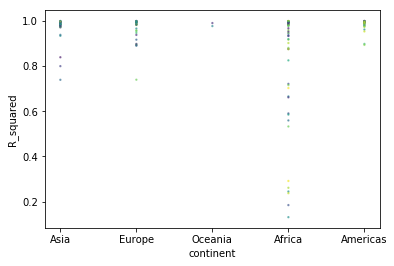

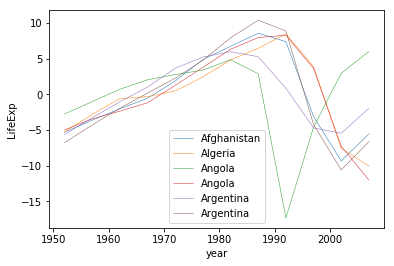

In [7]:
# def draw_figure4_5(gapminder_g):
#     rsquared = pd.DataFrame(index = gapminder_g.index, columns = ['R_squared', 'x'])
#     for i in range(len(gapminder_g)):   
#         poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
#         polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
#         rsquared.iloc[i,0] = np.corrcoef(list(gapminder_g.iloc[i,:]), polyval)[0,1]
#     rsquared = rsquared.reset_index()
#     temp1 = list(set(rsquared.continent))
#     k = 0
#     for i in temp1:
#         k=k+1
#         rsquared.iloc[rsquared.index[rsquared['continent'] == i], 3] = k
#     plt.scatter(rsquared['x'], rsquared['R_squared'], s = 2, c=np.random.rand(len(rsquared)),alpha=0.5)
#     plt.xticks([1,2,3,4,5],temp1)
#     plt.xlabel('continent')
#     plt.ylabel('R_squared')
#     plt.show()
#     temp = rsquared[rsquared['R_squared']<0.3].index
#     for i in temp:   
#         poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
#         polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
#         plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = gapminder['country'][i])
#     plt.xlabel('year')
#     plt.ylabel('LifeExp')
#     plt.legend()
#     plt.show()
#     return

# draw_figure4_5(gapminder_g)

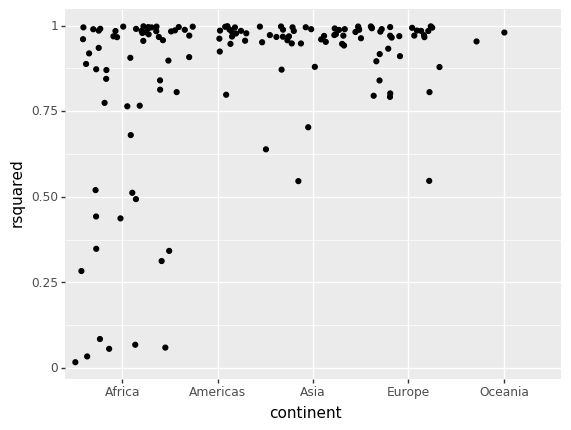

<ggplot: (116252576292)>

In [69]:
'''
by Chenxi Zhang, 20201217:
1.研究模型质量的好坏（R方指标）
'''
models = gapminder.groupby(by=['country','continent']).apply(lambda x:smf.ols(formula='lifeExp~year',data=x).fit().rsquared)
models = models.reset_index().rename(columns = {0:'rsquared'})
(ggplot(models,aes('continent','rsquared')) +
geom_jitter(width = 0.5))

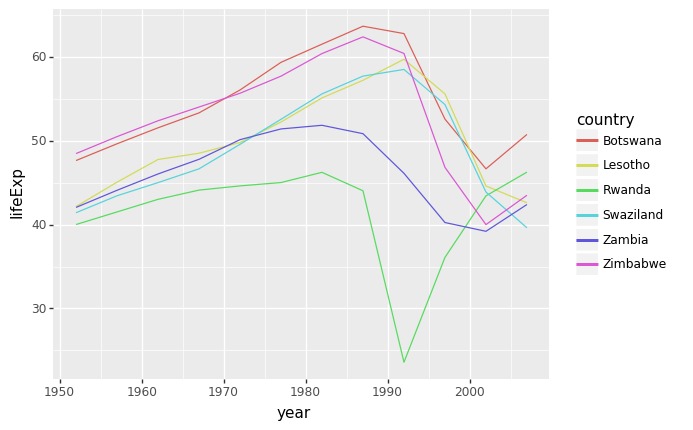

<ggplot: (116252501915)>

In [70]:
'''
by Chenxi Zhang, 20201217:
1.找出模型拟合最差的几个非洲国家，对其预计寿命与年份间真实情况进行观察
'''
bad_fit = models[models['rsquared']<0.25]
g_b = pd.merge(gapminder,bad_fit)
(ggplot(g_b,aes('year', 'lifeExp', colour = 'country')) +
    geom_line())

## 25.2 列表列
列表列是定义在数据框中的一种数据类型。它以列表为元素，并作为数据框的一列。

列表列作为一种中间数据结构，最大用处是方便对我们数据进行处理和分析。 
### 25.2.1 新建列表列

> data = []  
> for i in range(len(file)):   
> &emsp; data.append(pd.read_csv(file[i],header=0,index_col=0))

In [8]:
pd.DataFrame({'x':[[1,2,3],[4,5,6]], 'y':['1,2','3,4,5']})

,x,y
0,"[1, 2, 3]","1,2"
1,"[4, 5, 6]","3,4,5"


### 25.2.2 嵌套还原

In [57]:
x1 = "a,b,c"
x2 = "d,e,f,g"

data = pd.DataFrame({'x1':[x1, x2], 'x2':[x1.split(','), x2.split(',')]})
data

,x1,x2
0,"a,b,c","[a, b, c]"
1,"d,e,f,g","[d, e, f, g]"


In [10]:
data0 = pd.DataFrame(columns = ['x1','x2'])
for x in range(len(data)):
    for y in range(len(data['x2'][x])):
        data0 = data0.append({'x1':data['x1'][x],'x2':data['x2'][x][y]}, ignore_index=True)

In [56]:
data0

,x1,x2
0,"a,b,c",a
1,"a,b,c",b
2,"a,b,c",c
3,"d,e,f,g",d
4,"d,e,f,g",e
5,"d,e,f,g",f
6,"d,e,f,g",g
